# The Problem Statement
ConnecTel Telecom Company is facing a pressing issue of customer churn, which poses a significant threat to its business sustainability and growth. The company's current retention strategy lacks precision and effectiveness, resulting in the loss of valuable customers to competitors 

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv(r"C:\Users\RUSBROWN\Downloads\Customer-Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

total charge should be float type as it is the total amount of money charged.

In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# Notice that the total revenue is an object instead of a float

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [4]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace= True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.describe(include=["object","bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


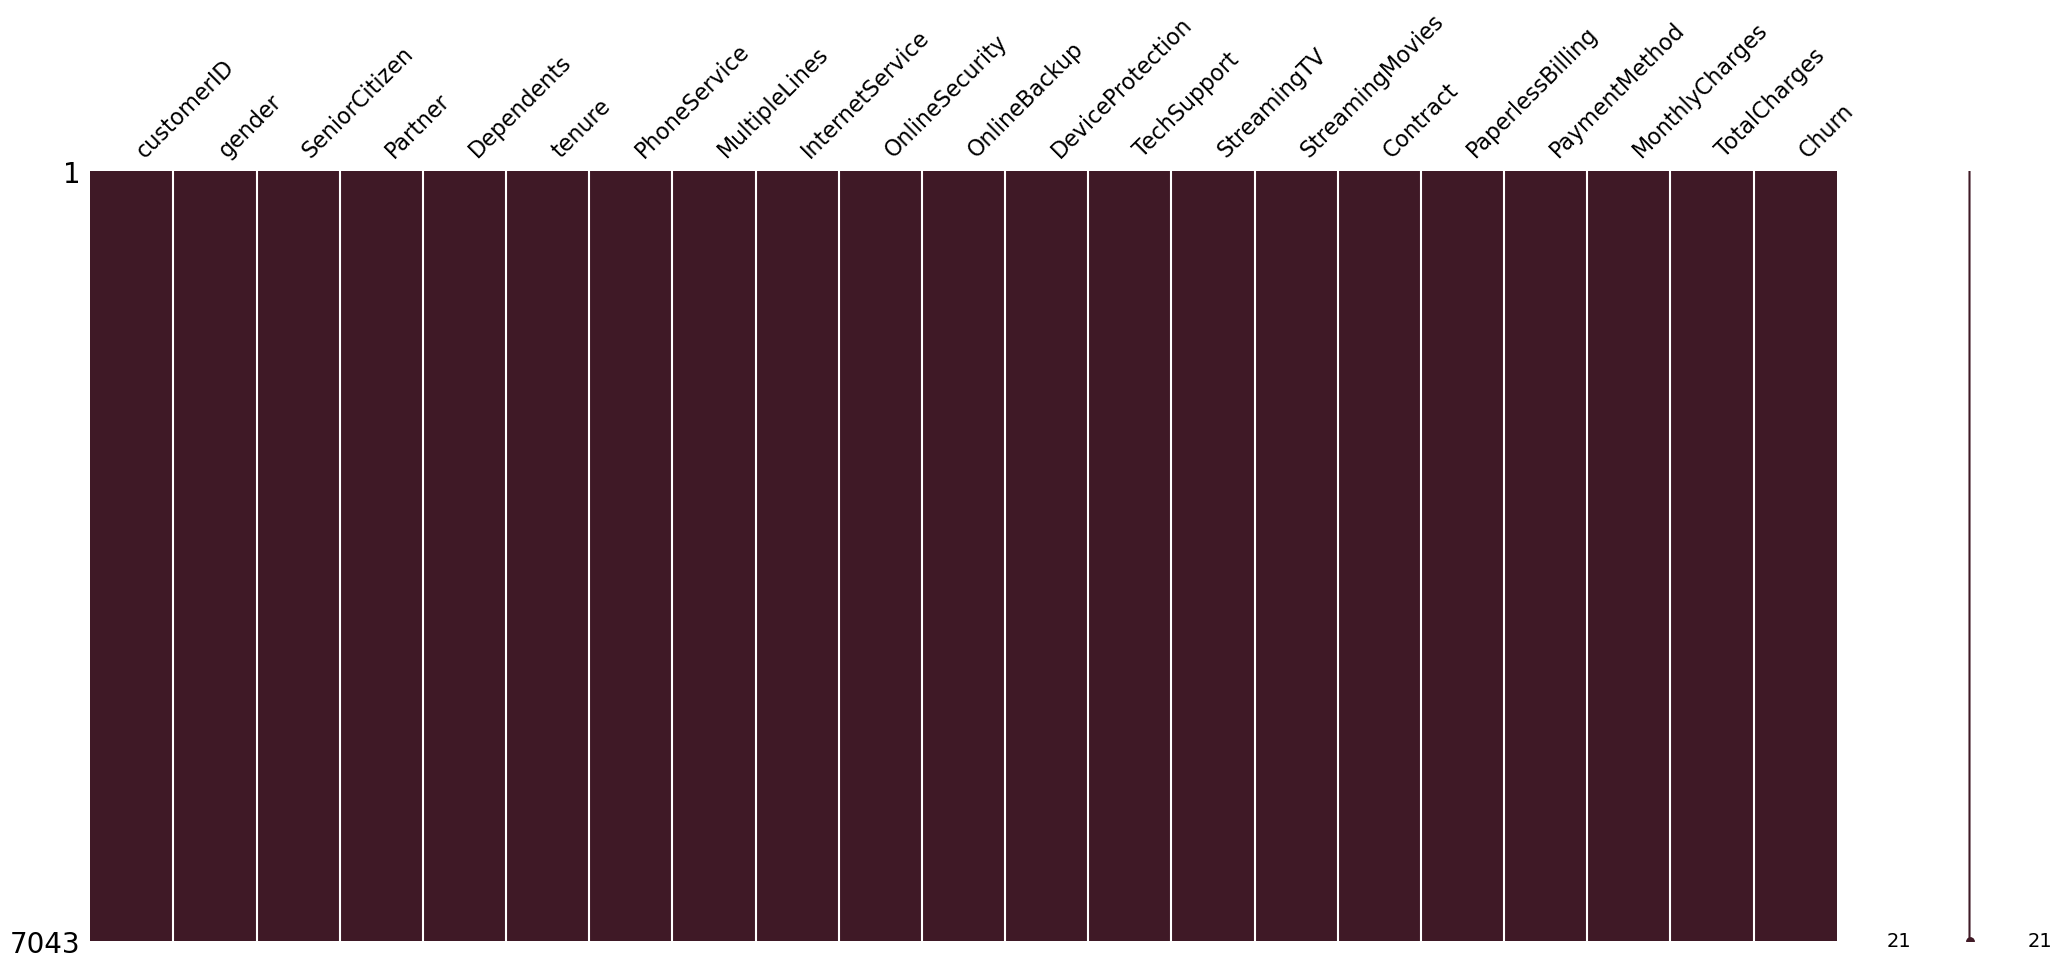

In [55]:
msno.matrix(df, figsize=(25, 10),color=(0.25, 0.10, 0.15));

# Univariate Analysis

In [5]:
df['Customerloyalty'] =(df['tenure']*df['MonthlyCharges'])-df['TotalCharges']

In [6]:
df['Customerloyalty'] = np.where(df['Customerloyalty'].values >= 0, 'Consistent','Not_consistent')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customerloyalty
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Consistent
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Consistent
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Not_consistent
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Consistent
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Not_consistent


Male      50.554608
Female    49.601820
Name: gender, dtype: float64


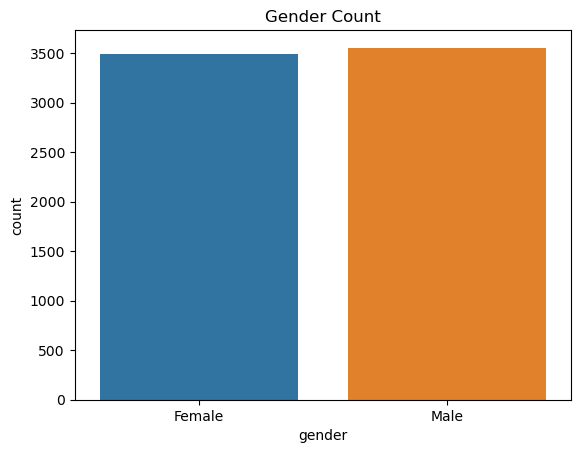

In [64]:
sns.countplot(x = "gender", data=df)
ax= df["gender"].value_counts()
label = (ax/7032)*100
print(label)
plt.title("Gender Count");

 Amount 50.55% of customers are males

0    83.916382
1    16.240046
Name: SeniorCitizen, dtype: float64


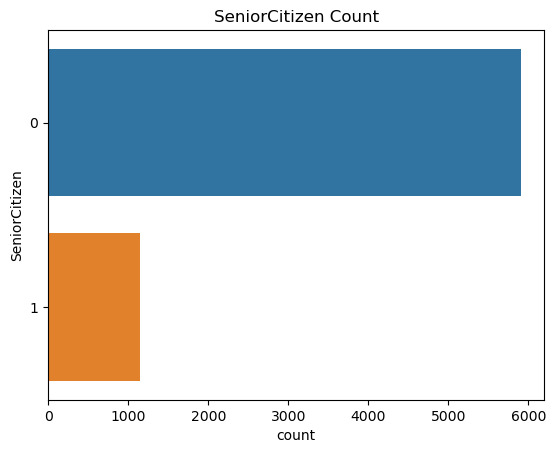

In [65]:
sns.countplot(y = "SeniorCitizen", data=df)
sc= df["SeniorCitizen"].value_counts()
label = (sc/7032)*100
print(label)
plt.title("SeniorCitizen Count");

Amount 83.91% of our customers are not senior citizens

No     51.777588
Yes    48.378840
Name: Partner, dtype: float64


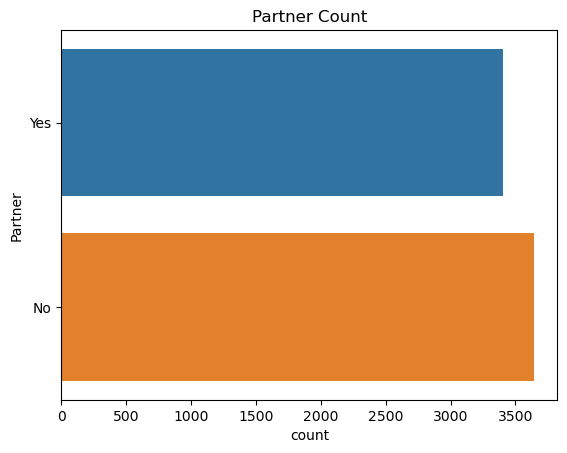

In [66]:
sns.countplot(y = "Partner", data=df)
pt= df["Partner"].value_counts()
label = (pt/7032)*100
print(label)
plt.title("Partner Count");

48.37% of customers have partners

No     70.150739
Yes    30.005688
Name: Dependents, dtype: float64


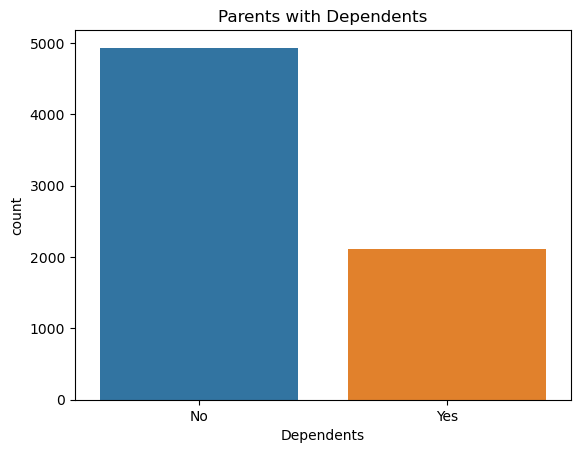

In [67]:
sns.countplot(x = "Dependents", data=df)
D= df["Dependents"].value_counts()
label = (D/7032)*100
print(label)
plt.title("Parents with Dependents");

70.15% do not have dependents, the total customer base have more individuals without dependents than individuals with children. 

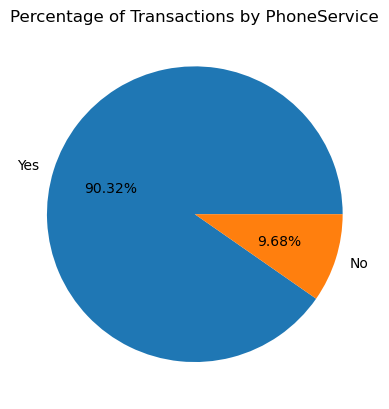

In [68]:
plt.title('Percentage of Transactions by PhoneService')
ps_option = df['PhoneService'].value_counts().index
ps_val = df['PhoneService'].value_counts().values
plt.pie(ps_val, labels = ps_option, autopct = '%1.2f%%');

90.32% of the customers have phone service.

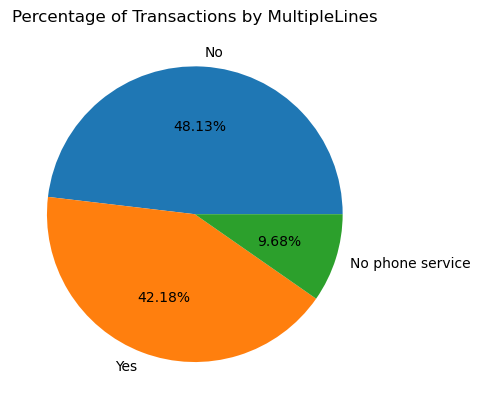

In [69]:
plt.title('Percentage of Transactions by MultipleLines')
Ml_option = df['MultipleLines'].value_counts().index
Ml_val = df['MultipleLines'].value_counts().values
plt.pie(Ml_val, labels = Ml_option, autopct = '%1.2f%%');

We have about 48.13% of the total users having multiple lines.

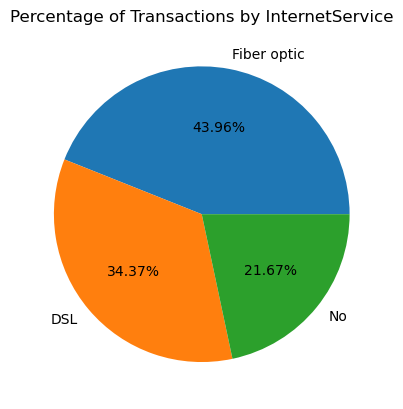

In [70]:
plt.title('Percentage of Transactions by InternetService')
is_option = df['InternetService'].value_counts().index
is_val = df['InternetService'].value_counts().values
plt.pie(is_val, labels = is_option, autopct = '%1.2f%%');

43.96% use fiber optics and 34.36% use DSL. In total 77.39% of the customer base have internet service available for their use.

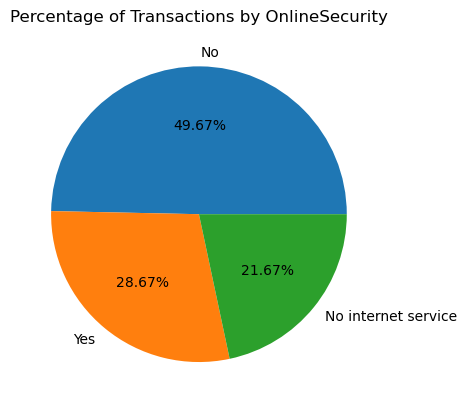

In [71]:
plt.title('Percentage of Transactions by OnlineSecurity')
os_option = df['OnlineSecurity'].value_counts().index
os_val = df['OnlineSecurity'].value_counts().values
plt.pie(os_val, labels = os_option, autopct = '%1.2f%%');

71.34% don't use the internet service.

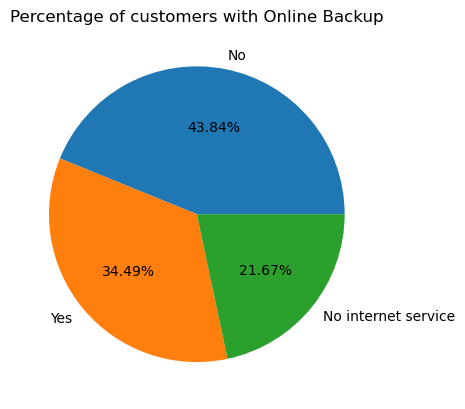

In [72]:
plt.title('Percentage of customers with Online Backup')
ob_option = df['OnlineBackup'].value_counts().index
ob_val = df['OnlineBackup'].value_counts().values
plt.pie(ob_val, labels = ob_option, autopct = '%1.2f%%');

34.49% have online backup service.

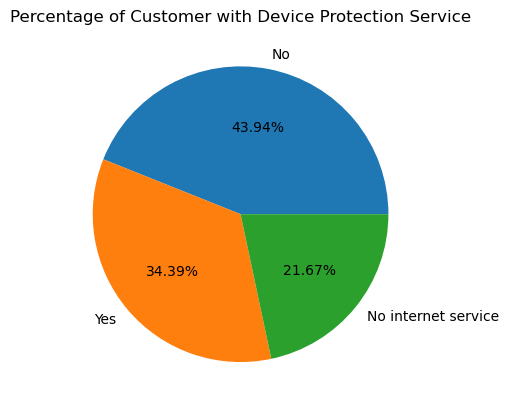

In [73]:
plt.title('Percentage of Customer with Device Protection Service')
dp_option = df['DeviceProtection'].value_counts().index
dp_val = df['DeviceProtection'].value_counts().values
plt.pie(dp_val, labels = dp_option, autopct = '%1.2f%%');

34.39% have device protection service. Notice that only customers with online backup service have access to the device protection service

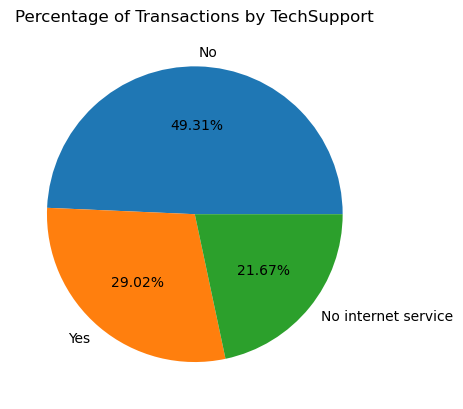

In [74]:
plt.title('Percentage of Transactions by TechSupport')
ts_option = df['TechSupport'].value_counts().index
ts_val = df['TechSupport'].value_counts().values
plt.pie(ts_val, labels = ts_option, autopct = '%1.2f%%');

Only 29.02% of customers have techsupport.

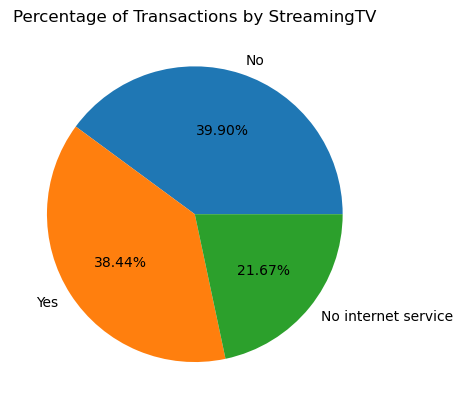

In [75]:
plt.title('Percentage of Transactions by StreamingTV')
st_option = df['StreamingTV'].value_counts().index
st_val = df['StreamingTV'].value_counts().values
plt.pie(st_val, labels = st_option, autopct = '%1.2f%%');

38.44% use streaming TV

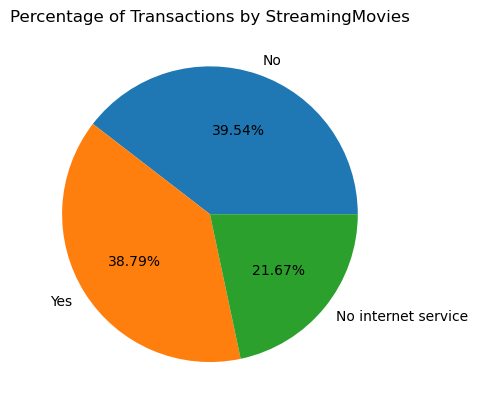

In [76]:
plt.title('Percentage of Transactions by StreamingMovies')
sm_option = df['StreamingMovies'].value_counts().index
sm_val = df['StreamingMovies'].value_counts().values
plt.pie(sm_val, labels = sm_option, autopct = '%1.2f%%');

Notice that all customers using streaming TV are also using the streaming movie service. 

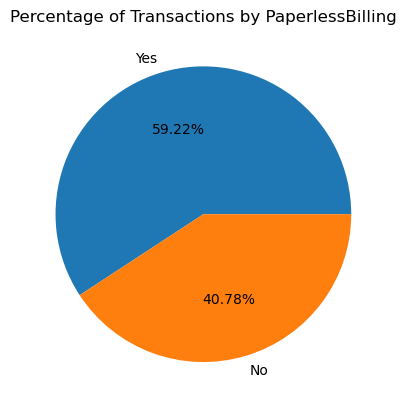

In [77]:
plt.title('Percentage of Transactions by PaperlessBilling')
pb_option = df['PaperlessBilling'].value_counts().index
pb_val = df['PaperlessBilling'].value_counts().values
plt.pie(pb_val, labels = pb_option, autopct = '%1.2f%%');

59.22% the customers prefer paperless billing.

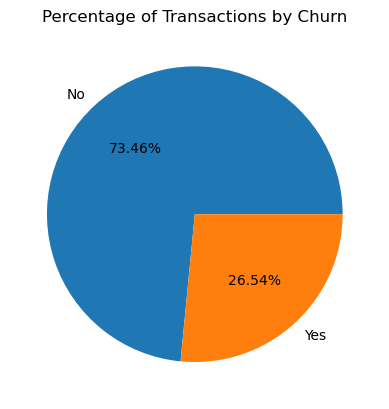

In [79]:
plt.title('Percentage of Transactions by Churn')
ch_option = df['Churn'].value_counts().index
ch_val = df['Churn'].value_counts().values
plt.pie(ch_val, labels = ch_option, autopct = '%1.2f%%');

26.58% ot the total customers have cancelled service.

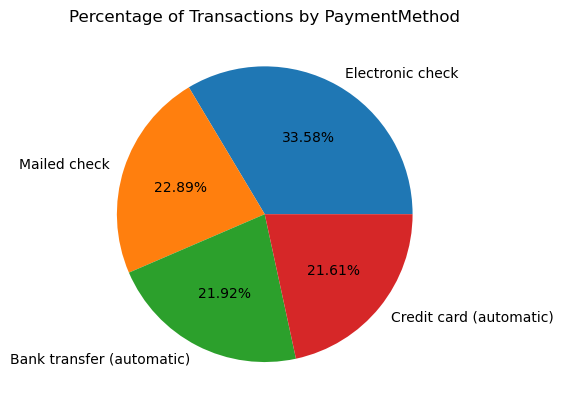

In [80]:
plt.title('Percentage of Transactions by PaymentMethod')
pay_option = df["PaymentMethod"].value_counts().index
pay_val = df["PaymentMethod"].value_counts().values
plt.pie(pay_val, labels = pay_option, autopct = '%1.2f%%');

33.63% of the customers made transactions from Electronic check. It appears than the ratio is fairly balanced as the disparity amongst the strata is not much.

In [35]:
print(f"Total categories in Contract : {df.Contract.value_counts()}\n")

Total categories in Contract : Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64



We have more customer subcribed to the month-to-month package

In [8]:
def longevity(x):
    if x<=22:
        return 'New_Customers'
    elif x<=42:
        return 'Old_Customers'
    elif x<=62:
        return 'Lasting_Customers'
    else: 
        return 'Grand_Customers'

df['Customer_longevity'] = df['tenure'].apply(longevity)
        

In [82]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customerloyalty,Customer_longevity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Consistent,New_Customers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Consistent,Old_Customers


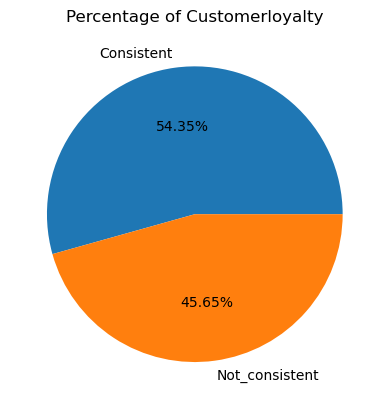

In [84]:
plt.title('Percentage of Customerloyalty')
cl_option = df['Customerloyalty'].value_counts().index
cl_val = df['Customerloyalty'].value_counts().values
plt.pie(cl_val, labels = cl_option, autopct = '%1.2f%%');

54.35% of the customers are consistent subscribers

In [83]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Customerloyalty', 'Customer_longevity'],
      dtype='object')

New_Customers        43.102958
Old_Customers        19.766780
Lasting_Customers    19.354380
Grand_Customers      17.932309
Name: Customer_longevity, dtype: float64


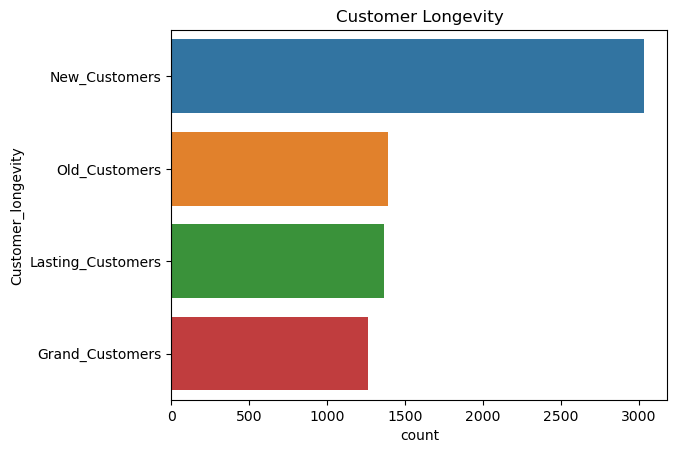

In [85]:
sns.countplot(y = 'Customer_longevity', data=df)
D= df['Customer_longevity'].value_counts()
label = (D/7032)*100
print(label)
plt.title("Customer Longevity");

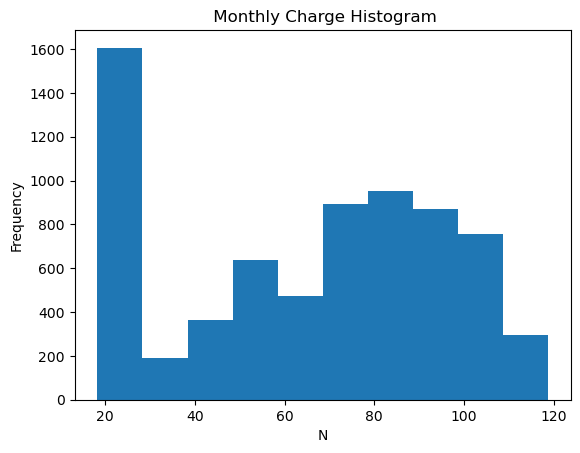

In [86]:
aw=df['MonthlyCharges']
plt.hist(aw, bins=10)
plt.ylabel('Frequency')
plt.xlabel('N')
plt.title(' Monthly Charge Histogram');

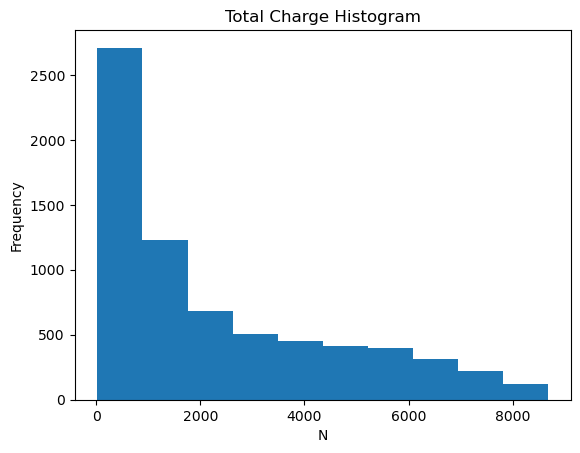

In [87]:
ay=df['TotalCharges']
plt.hist(ay, bins=10)
plt.ylabel('Frequency')
plt.xlabel('N')
plt.title('Total Charge Histogram');

# Bivariate Analysis

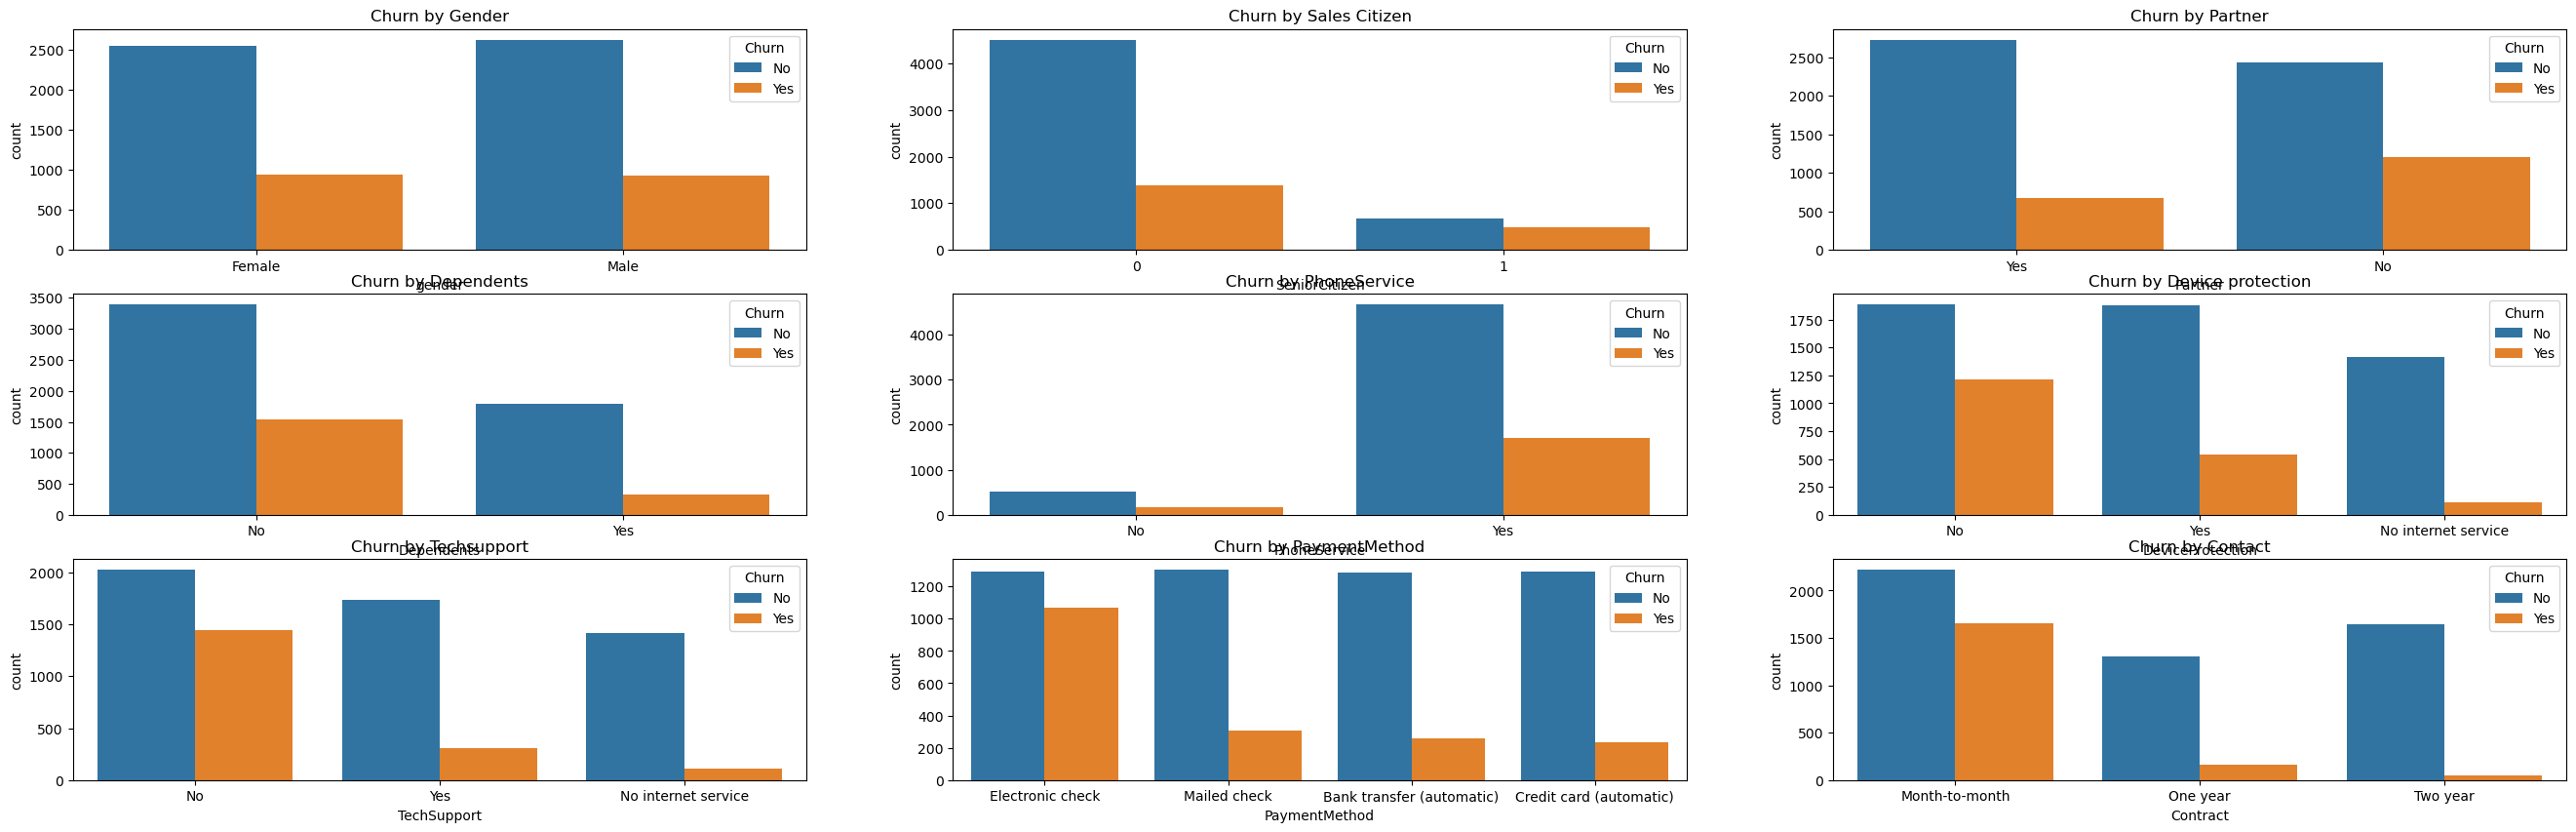

In [88]:
fig, axs= plt.subplots(3,3, figsize=(33,10))

sns.countplot(data=df,x='gender',hue="Churn", ax=axs[0,0])
axs[0,0].set_title("Churn by Gender")

sns.countplot(data=df,x="SeniorCitizen",hue="Churn", ax=axs[0,1])
axs[0,1].set_title("Churn by Sales Citizen")

sns.countplot(data=df,x='Partner',hue="Churn", ax=axs[0,2])
axs[0,2].set_title("Churn by Partner")

sns.countplot(data=df,x='Dependents',hue="Churn", ax=axs[1,0])
axs[1,0].set_title("Churn by Dependents")

sns.countplot(data=df,x="PhoneService",hue="Churn", ax=axs[1,1])
axs[1,1].set_title("Churn by PhoneService")

sns.countplot(data=df,x="DeviceProtection",hue="Churn", ax=axs[1,2])
axs[1,2].set_title("Churn by Device protection");

sns.countplot(data=df,x="TechSupport",hue="Churn", ax=axs[2,0])
axs[2,0].set_title("Churn by Techsupport");

sns.countplot(data=df,x="PaymentMethod",hue="Churn", ax=axs[2,1])
axs[2,1].set_title("Churn by PaymentMethod");

sns.countplot(data=df,x="Contract",hue="Churn", ax=axs[2,2])
axs[2,2].set_title("Churn by Contact");

Text(0.5, 1.0, 'Churn by Customer_longevity')

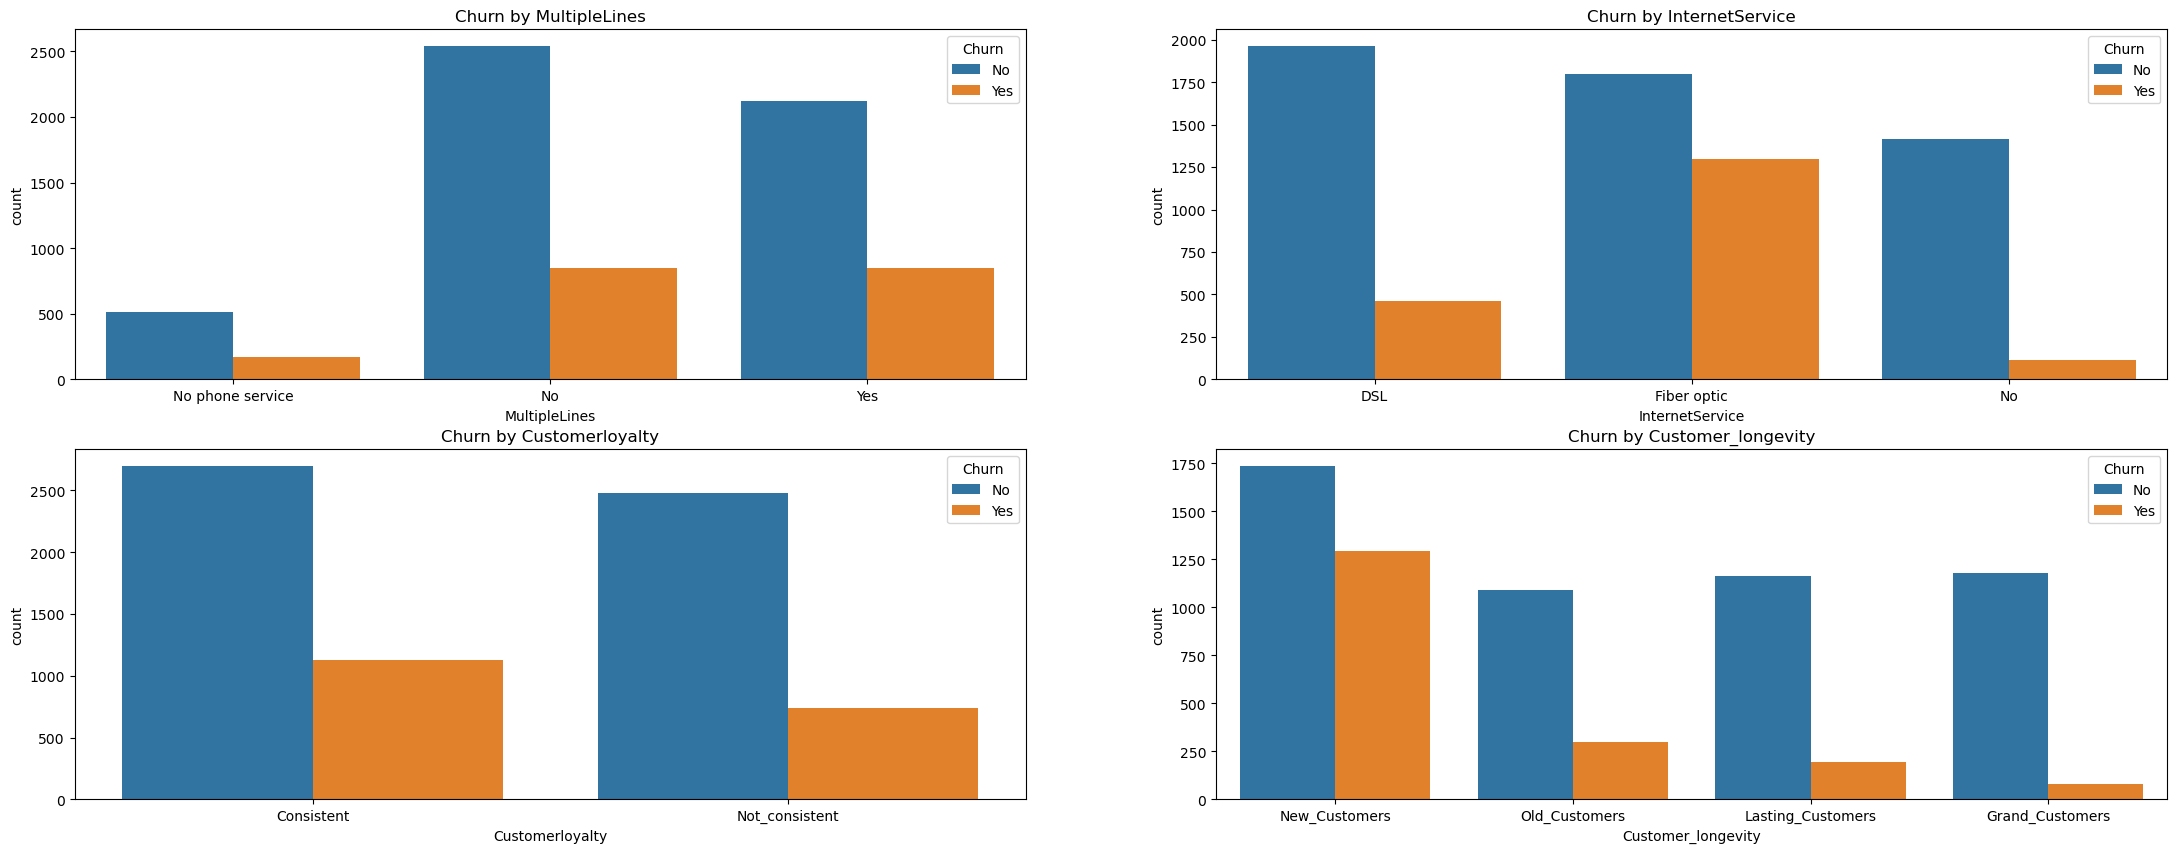

In [90]:
fig, axs= plt.subplots(2,2, figsize=(27,10))

sns.countplot(data=df,x='MultipleLines',hue="Churn", ax=axs[0,0])
axs[0,0].set_title("Churn by MultipleLines")

sns.countplot(data=df,x="InternetService",hue="Churn", ax=axs[0,1])
axs[0,1].set_title("Churn by InternetService")

sns.countplot(data=df,x='Customerloyalty',hue="Churn", ax=axs[1,0])
axs[1,0].set_title("Churn by Customerloyalty")

sns.countplot(data=df,x='Customer_longevity',hue="Churn", ax=axs[1,1])
axs[1,1].set_title("Churn by Customer_longevity")

Oberservation of fields with very high churn rate:
- New customers with monthly subscription contracts.
- Customer using Fiber Optic internet service.
- Customers without Tech Support.
- Customers using the Electronic Check.
- Customers without Device Protection.

In [92]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Customerloyalty', 'Customer_longevity'],
      dtype='object')

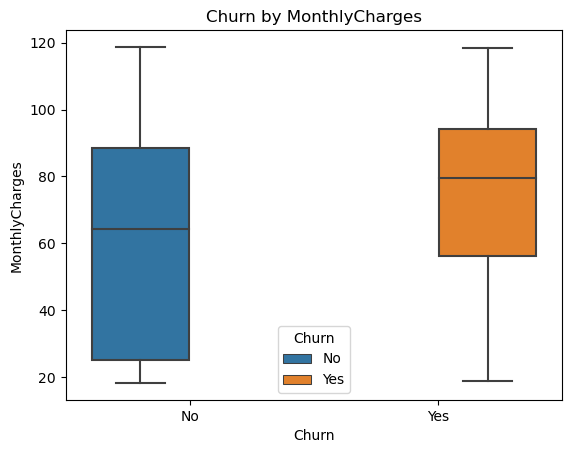

In [111]:
sns.boxplot(x='Churn', y="MonthlyCharges", data=df, hue="Churn")
plt.title('Churn by MonthlyCharges');

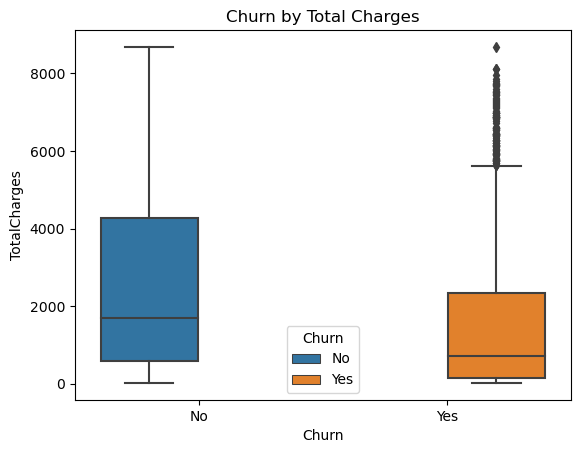

In [110]:
sns.boxplot(x='Churn',y='TotalCharges', data=df, hue='Churn')
plt.title("Churn by Total Charges");

# Multivariate Analysis

C:\Users\RUSBROWN\AppData\Local\Temp\ipykernel_9936\1026514421.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


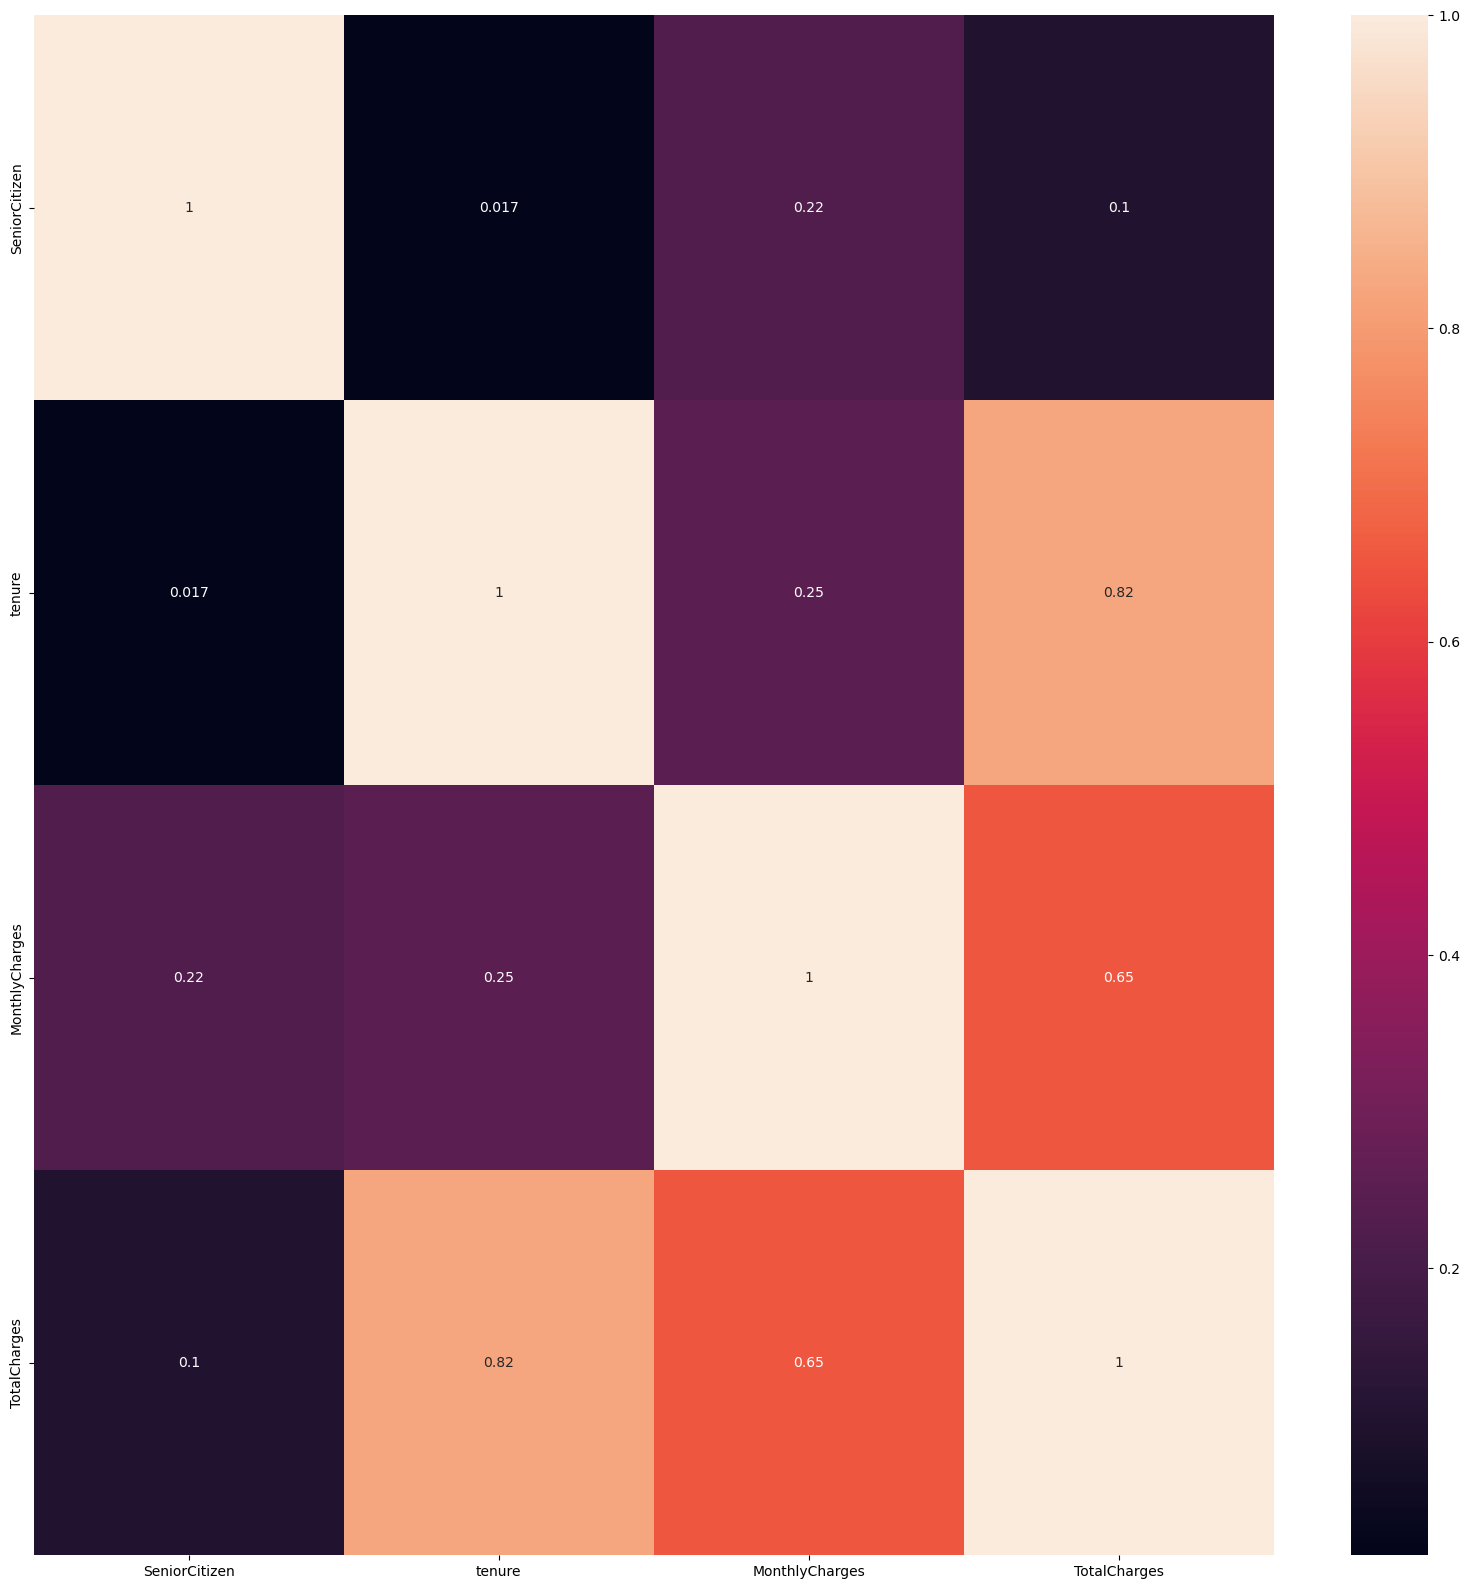

In [114]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(),annot=True);

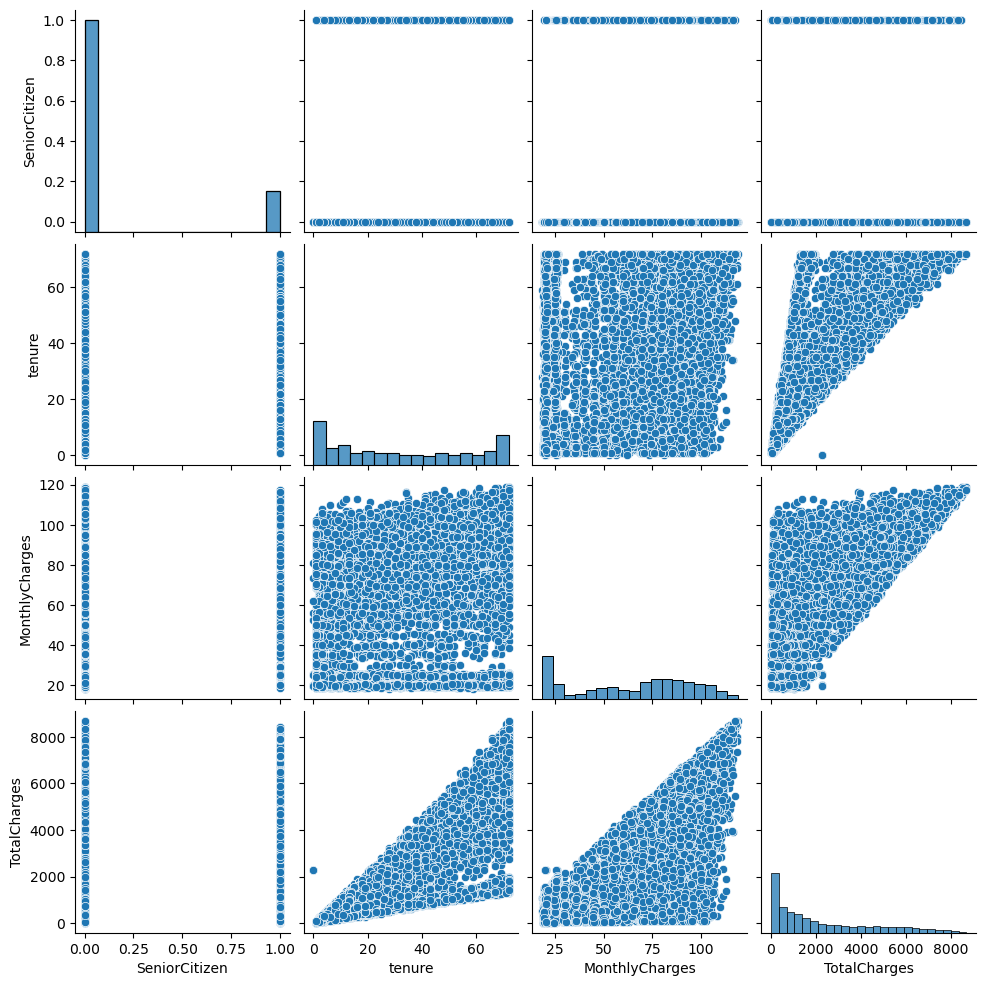

In [120]:
sns.pairplot(df)

In [9]:
def iloc_example(df,col):
    for i in df.index:
        val = df[col].iloc[i]
        if val == "No":
            df.at[i, col]= 0
        else:
            df.at[i, col]= 1

iloc_example(df, "Churn")

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customerloyalty,Customer_longevity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Consistent,New_Customers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,Consistent,Old_Customers


# Observations:
- New customers with monthly subscription contracts.
- Customer using Fiber Optic internet service.
- Customers without Tech Support.
- Customers using the Electronic Check.
- Customers without Device Protection.

# Actionable insight
- Track customer retention markers like how frequently a customer uses a subscribed service.
- Track customer retention rate, churn rate and lifetime value.
- Measure customer loyalty using the CRR formula: ((E-N)/S)*100.
  E--number of customer at the end of a week/month/quarter/year/
  N--number of new customer during this period
  S-- number of customers at the start of the period-
- I will recommend that management engage customer on a personal level by creating customer loyalty programs and benefits. 

# Machine Learning

In [10]:
df["label"] = (df.Churn).astype(int)

In [128]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Customerloyalty', 'Customer_longevity', 'label'],
      dtype='object')

In [11]:
df=df[['Partner', 'Dependents','tenure','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract','PaymentMethod', 'MonthlyCharges', 'TotalCharges','label']]

In [141]:
df.dtypes

Partner              object
Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
label                 int32
dtype: object

In [12]:
# encode categorical features of the dataset

class_data = pd.get_dummies(df, columns=["Partner","Dependents","OnlineSecurity",
                                         "OnlineBackup","DeviceProtection","TechSupport",
                                        "Contract","PaymentMethod"], 
                            drop_first=True)

In [13]:
# segment data
y = class_data['label'] # target
x = class_data.drop('label', axis = True)

In [14]:
# scale_pred data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_x = scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(scaled_x, y, test_size=0.3, random_state=0)

# Building a base classifier model
- Naive Bayes Classifier
- Random Forest Classifier
- KNeighbors Classifier

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [147]:
# instantiate the classifier
# instantiate the model and fit to the scaled dataset
nby_model = GaussianNB()
nby_model.fit(X_train,y_train)

GaussianNB()

In [149]:
nby_pred = nby_model.predict(X_val)
nby_pred

array([1, 0, 1, ..., 0, 0, 1])

In [151]:
# accuracy
nby_score= nby_model.score(X_val, y_val)
print(f"model accuracy score is: {nby_score}")

model accuracy score is: 0.6975863700899195


In [161]:
print("Naive Bayes Model Accuracy",accuracy_score(y_val, nby_pred))
print("Classification Report:\n", classification_report(y_val, nby_pred))

Naive Bayes Model Accuracy 0.6975863700899195
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1560
           1       0.46      0.81      0.58       553

    accuracy                           0.70      2113
   macro avg       0.68      0.74      0.67      2113
weighted avg       0.79      0.70      0.72      2113



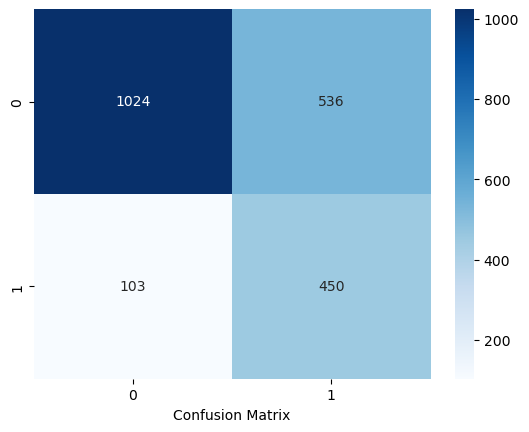

In [170]:
# create a confusion matrix
nbcm= confusion_matrix(y_val, nby_pred)

# visualize the confusion matrix
sns.heatmap(nbcm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.show()

# Second model

In [152]:
knc_model = KNeighborsClassifier()
knc_model.fit(X_train,y_train)

KNeighborsClassifier()

In [162]:
knc_pred = knc_model.predict(X_val)
knc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
# accuracy
knc_score= knc_model.score(X_val, y_val)
print(f"model accuracy score is: {knc_score}")

model accuracy score is: 0.7699952673923331


In [171]:
print("KNeighbors Model Accuracy",accuracy_score(y_val, knc_pred))
print("Classification Report:\n", classification_report(y_val, knc_pred))

KNeighbors Model Accuracy 0.7699952673923331
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1560
           1       0.57      0.48      0.52       553

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



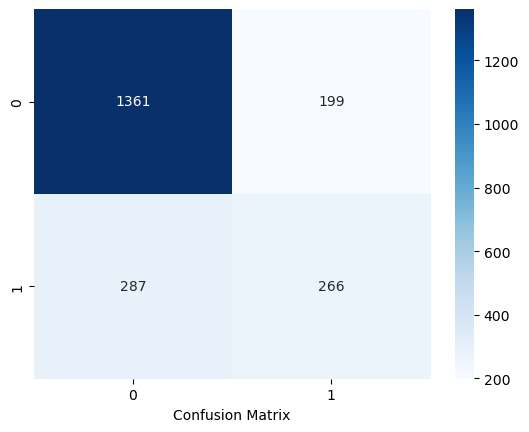

In [173]:
# create a confusion matrix
kncm= confusion_matrix(y_val, knc_pred)

# visualize the confusion matrix
sns.heatmap(kncm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.show()

knc_model gave better prediction

# Third Model

In [154]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [155]:
# accuracy
rfc_score= rfc_model.score(X_val, y_val)
print(f"model accuracy score is: {rfc_score}")

model accuracy score is: 0.7799337434926644


In [166]:
rfc_pred = rfc_model.predict(X_val)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [174]:
print("Random Forest Model Accuracy",accuracy_score(y_val, rfc_pred))
print("Classification Report:\n", classification_report(y_val, rfc_pred))

Random Forest Model Accuracy 0.7799337434926644
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1560
           1       0.60      0.47      0.53       553

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



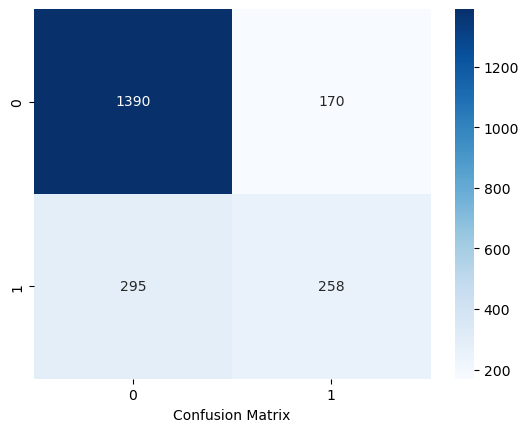

In [175]:
# create a confusion matrix
rfcm= confusion_matrix(y_val, rfc_pred)

# visualize the confusion matrix
sns.heatmap(rfcm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.show()

rfc_model performed better than knc_model and nby_model

# Fourth model using tensorflow

In [18]:
import tensorflow as tf

In [17]:
X_train, X_temp, y_train, y_temp=train_test_split(scaled_x,y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test=train_test_split(X_temp,y_temp, test_size=0.5, random_state=0)

In [19]:
ks_model = tf.keras.Sequential([
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [20]:
ks_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [22]:
ks_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
265/265 [==============================] - 2s 6ms/step - loss: 0.4049 - accuracy: 0.8062 - val_loss: 0.4331 - val_accuracy: 0.7999
Epoch 2/10
265/265 [==============================] - 1s 4ms/step - loss: 0.4050 - accuracy: 0.8054 - val_loss: 0.4292 - val_accuracy: 0.8020
Epoch 3/10
265/265 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8085 - val_loss: 0.4300 - val_accuracy: 0.8027
Epoch 4/10
265/265 [==============================] - 1s 4ms/step - loss: 0.4036 - accuracy: 0.8064 - val_loss: 0.4283 - val_accuracy: 0.8006
Epoch 5/10
265/265 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 0.8092 - val_loss: 0.4278 - val_accuracy: 0.8041
Epoch 6/10
265/265 [==============================] - 1s 4ms/step - loss: 0.4028 - accuracy: 0.8064 - val_loss: 0.4355 - val_accuracy: 0.8013
Epoch 7/10
265/265 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8064 - val_loss: 0.4395 - val_accuracy: 0.8048
Epoch 

The ks_model has 80.62% accuracy on training dataset and a 80.41% accuracy on validation data, this show how well the model will be able to generalize on new dataset it has not seen before.

In [23]:
ks_model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.7835


[0.43313682079315186, 0.7835344076156616]

# What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?

In the context of customer churn prediction, the business should be more concerned with better results on true positive rather than false negative. 

True positives are the instances where the churn prediction model correctly identifies customers who are likely to churn, allowing the business to implement targeted retention initiatives to prevent customer churn. These are the customers who are at a high risk of leaving and are in need of immediate attention.

False negatives, on the other hand, occur when the churn prediction model incorrectly classifies customers as not likely to churn when they actually do end up churning. This can result in missed opportunities for implementing retention strategies and loss of customers to competitors.

Effectiveness in improving true positive results means that the business can accurately identify customers at high risk of churn, allowing them to intervene with appropriate retention measures. This can help in reducing actual churn and retaining valuable customers.

However, it is also important to strike a balance and minimize false negative results as well. A high false negative rate would result in missed opportunities to retain customers who were misclassified as not at risk of churn. Therefore, it's crucial to find a balance between minimizing false negatives and maximizing true positives.